In [1]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import os
import glob
import re
nltk.download('punkt')
nltk.download('stopwords')
import math
from nltk.stem import PorterStemmer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mouaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mouaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
repertoire = os.path.join(os.getcwd(), "Collections")

documents = []
fichiers = []

# Utilisez glob pour trouver tous les fichiers dans le répertoire
types_de_fichiers = ["*.txt", "*.001", "*.501", "*.627", "*.850"]  # Ajoutez d'autres extensions si nécessaire

for type_fichier in types_de_fichiers:
    chemin_fichiers = os.path.join(repertoire, type_fichier)
    documents.extend(glob.glob(chemin_fichiers))
#print(len(documents))

# Parcourez les fichiers trouvés
contenu_fichiers= []
for chemin_fichier in documents:
    with open(chemin_fichier, 'r', encoding='utf-8') as fichier:
        contenu_fichiers=(fichier.read())
        fichiers.append(contenu_fichiers)
        
mes_fichiers= []
fils= ''
for i in ((fichiers)) :  
    fils+= i
docs=str(fils).split("********************************************")
#print(fils)

#for doc in docs:
#    print(doc)
#    print("---------------------------------------------------------------------------------")
dict= {}
for doc in docs:
    lignes = str(doc).splitlines()
    #Parcourir les lignes pour trouver le numéro du fichier
    for ligne in lignes:
        if "Document " in ligne:
            numero_du_fichier = ligne.split()[-1]
            nouvelle_contenu = "\n".join(ligne for ligne in lignes if "Document " not in ligne)
            # Ajouter au dictionnaire
            dict[numero_du_fichier] = nouvelle_contenu
            #print(numero_du_fichier)
            
# Trier le dictionnaire par numéro de document
dict_trie = {k: dict[k] for k in sorted(dict, key=lambda x: int(x))}
for numero, contenu in dict_trie.items():
    print(f"Documenttt {numero}:\n{contenu}\n{'*' * 40}\n")


Documenttt 1:

THE INDIAN COUNCIL OF LIBRARY AND INFORMATION SERVICES RESEARCH AND TRAINING:
A PROPOSAL FOR CONSIDERATION.

CRITICALLY EXAMINES THE INDIAN LIBRARY SCENE. THE MANAGEMENT, OPERATION, AND
SERVICES OF MOST LIBRARIES IS INEFFICIENT AND INEFFECTIVE, RESULTING IN GRAVE
MISALLOCATION AND UNDERUTILISATION OF LIBRARY RESOURCES. LITTLE MAJOR RESEARCH
HAS BEEN CARRIED OUT. UNIVERSITY LIBRARIANSHIP COURSES ARE NOT MUCH HELP FOR
MANAGING AND OPERATING LIBRARIES EFFICIENTLY. THE MAJOR NATIONAL INSTITUTIONS
HAVE SERIOUS LIMITATIONS. TO IMPROVE THE SITUATION, PROPOSES THE ESTABLISHMENT
OF AN INDIAN COUNCIL OF LIBRARY AND INFORMATION SERVICES RESEARCH AND
TRAINING. THE COUNCIL WOULD BE SET UP BY THE GOVERNMENT AND HAVE WELL-DEFINED
ROLES AND FUNCTIONS COVERING ALL ASPECTS OF INDIAN LIBRARIANSHIP.
****************************************

Documenttt 2:

THE LINGERING FRAGRANCE: PROCEEDINGS OF THE XXIV ALL INDIA LIBRARY CONFERENCE,
BANGALORE.

PAPERS AND PROCEEDINGS FROM THE CONFERENCE, WI

In [24]:
Lancaster = nltk.LancasterStemmer()

def preprocess_text_exp_reg_lancaster(text):
    #expression_reguliere = nltk.RegexpTokenizer('\w+-\w+')
    expression_reguliere = nltk.RegexpTokenizer('(?:[A-Za-z]\.)+|[A-Za-z]+[\-@]\d+(?:\.\d+)?|\d+[A-Za-z]+|\d+(?:[\.\,]\d+)?%?|\w+(?:[\-/]\w+)*')
    words = expression_reguliere.tokenize(text) 
    #MotsVides = nltk.corpus.stopwords.words('english')
    TermesSansMotsVides = [Lancaster.stem(word) for word in words if  word.lower() not in stopwords.words('english')]
    #words = re.findall(r'\b\w+(?:-\w+)?\b', text)
    #words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]
    return TermesSansMotsVides

print(preprocess_text_exp_reg_lancaster("THE side"))

['sid']


In [35]:
#fonction prétraitement
Porter = nltk.PorterStemmer()
Lancaster = nltk.LancasterStemmer()
def preprocess_text_split_porter(text):
    words = word_tokenize(text.lower())
    words = [Porter.stem(word) for word in words if word.isalnum() and word.lower() not in stopwords.words('english')]
    return words
def preprocess_text_split_lancaster(text):
    words = word_tokenize(text.lower())
    words = [Lancaster.stem(word) for word in words if word.isalnum() and word.lower() not in stopwords.words('english')]
    return words
def preprocess_text_exp_reg_porter(text):
    #expression_reguliere = nltk.RegexpTokenizer('\w+-\w+')
    expression_reguliere = nltk.RegexpTokenizer('(?:[A-Za-z]\.)+|[A-Za-z]+[\-@]\d+(?:\.\d+)?|\d+[A-Za-z]+|\d+(?:[\.\,]\d+)?%?|\w+(?:[\-/]\w+)*')
    words = expression_reguliere.tokenize(text) 
    #MotsVides = nltk.corpus.stopwords.words('english')
    TermesSansMotsVides = [Porter.stem(word) for word in words if  word.lower() not in stopwords.words('english')]
    #words = re.findall(r'\b\w+(?:-\w+)?\b', text)
    #words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]
    return TermesSansMotsVides

def preprocess_text_exp_reg_lancaster(text):
    #expression_reguliere = nltk.RegexpTokenizer('\w+-\w+')
    expression_reguliere = nltk.RegexpTokenizer('(?:[A-Za-z]\.)+|[A-Za-z]+[\-@]\d+(?:\.\d+)?|\d+[A-Za-z]+|\d+(?:[\.\,]\d+)?%?|\w+(?:[\-/]\w+)*')
    words = expression_reguliere.tokenize(text) 
    #MotsVides = nltk.corpus.stopwords.words('english')
    TermesSansMotsVides = [Lancaster.stem(word) for word in words if  word.lower() not in stopwords.words('english')]
    #words = re.findall(r'\b\w+(?:-\w+)?\b', text)
    #words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]
    return TermesSansMotsVides

#fonction pour terme->frequence dans un doc
def create_term_frequency_split_porter(document):
    words = preprocess_text_split_porter(document)
    term_frequency = Counter(words)
    return term_frequency
def create_term_frequency_split_lancaster(document):
    words = preprocess_text_split_lancaster(document)
    term_frequency = Counter(words)
    return term_frequency
def create_term_frequency_token_porter(document):
    words = preprocess_text_exp_reg_porter(document)
    term_frequency = Counter(words)
    return term_frequency
def create_term_frequency_token_lancaster(document):
    words = preprocess_text_exp_reg_lancaster(document)
    term_frequency = Counter(words)
    return term_frequency

# Fonction fichier inverse 
def create_inverse_frequency_split_porter(dict):
    inverse_frequency = {}
    for numero, contenu in dict.items():
        term_frequency = create_term_frequency_split_porter(contenu)
        for term, frequency in term_frequency.items():
            key = (term, numero)
            inverse_frequency[key] = frequency

    return inverse_frequency
def create_inverse_frequency_split_lancaster(documents):
    inverse_frequency = {}
    for numero, contenu in dict_trie.items():
        term_frequency = create_term_frequency_split_lancaster(contenu)
        for term, frequency in term_frequency.items():
            key = (term, numero)
            inverse_frequency[key] = frequency
    return inverse_frequency

def create_inverse_frequency_token_porter(documents):
    inverse_frequency = {}
    for numero, contenu in dict_trie.items():
        term_frequency = create_term_frequency_token_porter(contenu)
        for term, frequency in term_frequency.items():
            key = (term, numero)
            inverse_frequency[key] = frequency

    return inverse_frequency

def create_inverse_frequency_token_lancaster(documents):
    inverse_frequency = {}
    for numero, contenu in dict_trie.items():
        term_frequency = create_term_frequency_token_lancaster(contenu)
        for term, frequency in term_frequency.items():
            key = (term, numero)
            inverse_frequency[key] = frequency

    return inverse_frequency





#document_term_frequencies = [create_term_frequency_split(doc) for doc in fichiers]
mots = []
for doc in docs:
    mots+= preprocess_text_exp_reg_lancaster(doc) 
MotsVides = nltk.corpus.stopwords.words('english')
TermesSansMotsVides = [token for token in mots if token not in MotsVides]


def norm_split_lancaster(document):
    mots = preprocess_text_split_lancaster(document)
    MotsVides = nltk.corpus.stopwords.words('english')
    TermesSansMotsVides = [terme for terme in mots if terme.lower() not in MotsVides]
    Lancaster = nltk.LancasterStemmer()
    TermesNormalisation = [Lancaster.stem(terme) for terme in TermesSansMotsVides]
    return TermesNormalisation
def norm_token_lancaster(document):
    mots = preprocess_text_exp_reg_lancaster(document)
    MotsVides = nltk.corpus.stopwords.words('english')
    TermesSansMotsVides = [terme for terme in mots if terme.lower() not in MotsVides]
    Lancaster = nltk.LancasterStemmer()
    TermesNormalisation = [Lancaster.stem(terme) for terme in TermesSansMotsVides]
    return TermesNormalisation

def norm_split_porter(document):
    mots = preprocess_text_split_porter(document)
    MotsVides = nltk.corpus.stopwords.words('english')
    TermesSansMotsVides = [terme for terme in mots if terme.lower() not in MotsVides]
    Porter = nltk.PorterStemmer()
    TermesNormalisation = [Porter.stem(terme) for terme in TermesSansMotsVides]
    return TermesNormalisation
def norm_token_porter(document):
    mots = preprocess_text_exp_reg_porter(document)
    MotsVides = nltk.corpus.stopwords.words('english')
    TermesSansMotsVides = [terme for terme in mots if terme.lower() not in MotsVides]
    Porter = nltk.PorterStemmer()
    TermesNormalisation = [Porter.stem(terme) for terme in TermesSansMotsVides]
    return TermesNormalisation

def poid_split_lancaster(doc,termm,inverse_freq):
    poi=0
    freq= doc.count(termm)
    term_freq=create_term_frequency_split_lancaster(doc)
    max_frequency = 0  # Initialisation de la fréquence maximale à 0
    # Initialisation du compteur de documents contenant le terme
    document_count = 0
    nbr_doc= len(docs)-1

    # Parcourir le dictionnaire pour trouver la fréquence maximale pour le document spécifique
    for term, frequency in term_freq.items():
        if frequency > max_frequency:
            max_frequency = frequency
        if termm==term:
            freq=frequency

    # Parcourir le dictionnaire pour compter les documents contenant le terme spécifié
    for (term, doc_id) in inverse_freq.keys():
        if term == termm:
            document_count += 1
    poi = (freq/max_frequency)*(math.log10((nbr_doc/document_count)+1))
    
    return poi

def poid_split_porter(doc,termm,inverse_freq):
    poi=0
    freq= doc.count(termm)
    term_freq=create_term_frequency_split_porter(doc)
    max_frequency = 0  # Initialisation de la fréquence maximale à 0
    # Initialisation du compteur de documents contenant le terme
    document_count = 0
    nbr_doc= len(docs)-1
    # Parcourir le dictionnaire pour trouver la fréquence maximale pour le document spécifique
    for term, frequency in term_freq.items():
        if frequency > max_frequency:
            max_frequency = frequency
        if termm==term:
            freq=frequency
    # Parcourir le dictionnaire pour compter les documents contenant le terme spécifié
    for (term, doc_id) in inverse_freq.keys():
        if term == termm:
            document_count += 1
    poi = (freq/max_frequency)*(math.log10((nbr_doc/document_count)+1))
    return poi

def poid_token_porter(doc,termm,inverse_freq):
    poi=0
    freq= doc.count(termm)
    term_freq=create_term_frequency_token_porter(doc)
    max_frequency = 0  # Initialisation de la fréquence maximale à 0
    # Initialisation du compteur de documents contenant le terme
    document_count = 0
    nbr_doc= len(docs)-1

    # Parcourir le dictionnaire pour trouver la fréquence maximale pour le document spécifique
    for term, frequency in term_freq.items():
        if frequency > max_frequency:
            max_frequency = frequency
        if termm==term:
            freq=frequency

    # Parcourir le dictionnaire pour compter les documents contenant le terme spécifié
    for (term, doc_id) in inverse_freq.keys():
        if term == termm:
            document_count += 1
    poi = (freq/max_frequency)*(math.log10((nbr_doc/document_count)+1))
    
    return poi

def poid_token_lancaster(doc,termm,inverse_freq):
    poi=0
    freq= doc.count(termm)
    term_freq=create_term_frequency_token_lancaster(doc)
    max_frequency = 0  # Initialisation de la fréquence maximale à 0
    # Initialisation du compteur de documents contenant le terme
    document_count = 0
    nbr_doc= len(docs)-1

    # Parcourir le dictionnaire pour trouver la fréquence maximale pour le document spécifique
    for term, frequency in term_freq.items():
        if frequency > max_frequency:
            max_frequency = frequency
        if termm==term:
            freq=frequency
    # Parcourir le dictionnaire pour compter les documents contenant le terme spécifié
    for (term, doc_id) in inverse_freq.keys():
        if term == termm:
            document_count += 1
    poi = (freq/max_frequency)*(math.log10((nbr_doc/document_count)+1))
    
    return poi




#document_term_frequencies = [create_term_frequency_split_lancaster(doc) for doc in docs]
#inverse_frequency = create_inverse_frequency_split_lancaster(docs)
#
#print("Termes et fréquences pour le premier document:")
#print(document_term_frequencies[0])
#
#
## fichier inverse de fréquences pour le terme "document" dans le premier document
#term_key = ("Researchers", 1)
#print(f"Fréquence du terme {term_key[0]} dans le premier document: {inverse_frequency.get(term_key, 0)}")




In [38]:
# Fonction pour créer un fichier descripteur
def create_descriptor(dict,  output_file4):
    ligne=0
    
    
    '''with open(output_file1, 'w') as f:
        inverse_frequency = create_inverse_frequency_split_lancaster(dict)

        for numero, contenu in dict_trie.items():
            term_frequency = create_term_frequency_split_lancaster(contenu)
            for term, frequency in term_frequency.items():
                weight = poid_split_lancaster(contenu, term, inverse_frequency)
                f.write(f"Document {numero}: Terme '{term}', Frequence: {frequency}, Poids: {weight}\n")
    with open(output_file2, 'w') as f:
        inverse_frequency = create_inverse_frequency_token_lancaster(dict)
        for numero, contenu in dict_trie.items():
            term_frequency = create_term_frequency_token_lancaster(contenu)
            for term, frequency in term_frequency.items():
                weight = poid_token_lancaster(contenu, term, inverse_frequency)
                f.write(f"Document {numero}: Terme '{term}', Frequence: {frequency}, Poids: {weight}\n")

    with open(output_file3, 'w') as f:
        inverse_frequency = create_inverse_frequency_split_porter(dict)
        for numero, contenu in dict_trie.items():
            term_frequency = create_term_frequency_split_porter(contenu)
            for term, frequency in term_frequency.items():
                weight = poid_split_porter(contenu, term, inverse_frequency)
                f.write(f"Document {numero}: Terme '{term}', Frequence: {frequency}, Poids: {weight}\n")'''


    with open(output_file4, 'w') as f:
        inverse_frequency = create_inverse_frequency_token_porter(dict)
        for numero, contenu in dict_trie.items():
            term_frequency = create_term_frequency_token_porter(contenu)
            for term, frequency in term_frequency.items():
                weight = poid_token_porter(contenu, term, inverse_frequency)
                f.write(f"Document {numero}: Terme '{term}', Frequence: {frequency}, Poids: {weight}\n")


# Exemple d'utilisation
#documents = ["This is the first document.", "This is the second document.", "And this is the third document."]
#output_file1 = "descripteursSplitLancaster.txt"
#output_file2 = "descripteursTokenLancaster.txt"
#output_file3 = "descripteursSplitPorter.txt"
output_file4 = "descripteursTokenPorter.txt"

create_descriptor(dict_trie,  output_file4)
#print(f"Fichier descripteur '{output_file}' créé avec succès.")

# Fonction pour créer un fichier inverse
# Fonction pour créer un fichier descripteur
def create_inverse_frequency_file(documents, output_file1, output_file2, output_file3, output_file4):
    with open(output_file1, 'w') as f:
        for numero, contenu in dict_trie.items():
            term_frequency = create_term_frequency_token_porter(contenu)
            terms = norm_split_lancaster(contenu)
            for trm in terms:    
                f.write(f" {trm}: {numero}\n")
    with open(output_file2, 'w') as f:
        for numero, contenu in dict_trie.items():
            terms = norm_token_lancaster(contenu)
            for trm in terms:
                f.write(f" {trm} {numero}\n")
    with open(output_file3, 'w') as f:
        for numero, contenu in dict_trie.items():
            terms = norm_split_porter(contenu)
            for trm in terms:
                f.write(f" {trm}: {numero}\n")
    with open(output_file4, 'w') as f:
        for numero, contenu in dict_trie.items():
            terms = norm_token_porter(contenu)
            for trm in terms:
                f.write(f" {trm}: {numero}\n")

output_file11 = "InversSplitLancaster.txt"
output_file22 = "InversTokenLancaster.txt"
output_file33 = "InversSplitPorter.txt"
output_file44 = "InversTokenPorter.txt"

#create_inverse_frequency_file(docs, output_file11, output_file22, output_file33, output_file44)


#print(poid(fichiers[0],"llms",create_inverse_frequency_split_lancaster()))

In [3]:
def apparaiment(phrase):
    expression_reguliere = r"^(not\s+)?\w+(\s+(and|or)\s+(not\s+)?\w+)*$"
    correspondance = re.match(expression_reguliere, phrase)

    if correspondance:
        return 1
    else:
        return 0
def exist_dans_doc(descripteurs_file,j,terme):
      # Initialiser le RSV à 1.0
    with open(descripteurs_file, "r") as fichier:
        lignes = fichier.readlines()
        for ligne in lignes:
            term = ligne.split(",")[0].split(":")[1].split("'")[1]
            num_doc = ligne.split(",")[0].split(":")[0].split(" ")[1]
            if str(terme) == str(term) and int(num_doc) == int(j) :
                return True
        return False
#print(exist_dans_doc("descripteursTokenPorter.txt",2,"separ"))

def not_exist_dans_doc(descripteurs_file,j,terme):
    with open(descripteurs_file, "r") as fichier:
        lignes = fichier.readlines()
        for ligne in lignes:
            term = ligne.split(",")[0].split(":")[1].split("'")[1]
            num_doc = ligne.split(",")[0].split(":")[0].split(" ")[1]
            if str(terme) == str(term) and int(num_doc) == int(j) :
                return False
        return True
#print(not_exist_dans_doc("descripteursTokenPorter.txt",2,"separ"))

def and_exist(descripteurs_file,j,phrase):
    sous_phrases = phrase.split("and")
    n= len(sous_phrases)
    for sous_phr in sous_phrases:
        sous_phr= sous_phr.replace(" ", "")
        if ("not" in sous_phr):
            phr= sous_phr.replace("not", "") 
            if not_exist_dans_doc(descripteurs_file,j,phr):
                n-=1
        else:
            if exist_dans_doc(descripteurs_file,j,sous_phr):
                n-=1
    if n==0:
        return True
    else: return False
#print(and_exist("descripteursTokenPorter.txt",2," separ and space and use"))

def or_exist(descripteurs_file,j,phrase):
    sous_phrases = phrase.split("or")
    n= 0
    for sous_phr in sous_phrases:
        sous_phr= sous_phr.replace(" ", "")
        if ("not" in sous_phr):
            phr= sous_phr.replace("not", "") 
            if not_exist_dans_doc(descripteurs_file,j,phr):
                n+=1
        else:
            if exist_dans_doc(descripteurs_file,j,sous_phr):
                n+=1
    if n==0:
        return False
    else: return True
#print(or_exist("descripteursTokenPorter.txt",2,"not separ or spac"))

def exist_request(descripteurs_file,j,phrase):
    sous_phrases = phrase.split("and")
    n=len(sous_phrases)
    for sous_phr in sous_phrases:
        sous_phr= sous_phr.replace(" ", "")
        if ("and" in sous_phr):
            sous_phr= sous_phr.replace("and", "")
            if and_exist(descripteurs_file,j,sous_phr)==True:
                n-=1
        elif ("or" in sous_phr):
            #sous_phr= sous_phr.replace("or", "")
            if or_exist(descripteurs_file,j,sous_phr)==True:
                n-=1
        elif ("not" in sous_phr):
            sous_phr= sous_phr.replace("not", "")
            if not_exist_dans_doc(descripteurs_file,j,sous_phr)==True:
                n-=1
        else:
            if exist_dans_doc(descripteurs_file,j,sous_phr)==True:
                n-=1
    if n==0 and apparaiment(phrase)==1:
        return True
    else: 
        return False

print(exist_request('descripteursTokenPorter.txt',1,"not hh"))

True


In [2]:
def calculer_rsv1(descripteurs_file, termes):
    dict_rsv = {}

    for i in range(1, 10):  # La limite doit être 6006 pour inclure 6005
        rsv = 0
        with open(descripteurs_file, "r") as fichier:
            lignes = fichier.readlines()
            for term in termes:
                for ligne in lignes:
                    terme = ligne.split(",")[0].split(":")[1].split("'")[1]
                    poid = ligne.split(",")[2].split(":")[1]
                    num_doc = ligne.split(",")[0].split(":")[0].split(" ")[1]
                    if str(term) == str(terme) and int(num_doc) == i:
                        rsv += (float(poid)) 
        dict_rsv[i] = rsv

    return dict_rsv
    
d=calculer_rsv1('descripteursSplitLancaster.txt',["ind"])
for i, val in d.items():
    if val!=0:
        print(f'{i}::  {val}') 


def det(descripteurs_file,i):
    with open(descripteurs_file, "r") as fichier:
        det=0
        lignes = fichier.readlines()
        for lign in lignes:
            poid = lign.split(",")[2].split(":")[1]
            num_doc = lign.split(",")[0].split(":")[0].split(" ")[1]
            if int(num_doc)== i:
                det+= float(poid)* float(poid)
    return det


1::  0.6492136857595642
2::  0.43280912383970943
3::  0.5193709486076513


In [4]:
def calculer_rsv11(descripteurs_file, termes):
    dict_rsv = {}
    for i in range(1, 6005):
        dict_rsv[i]=0
    with open(descripteurs_file, "r") as fichier:
        lignes = fichier.readlines()
    for term in termes:
        for ligne in lignes:
            terme = ligne.split(",")[0].split(":")[1].split("'")[1]
            poid = ligne.split(",")[2].split(":")[1]
            num_doc = ligne.split(",")[0].split(":")[0].split(" ")[1]
            if str(term) == str(terme):
                dict_rsv[int(num_doc)] += float(poid) 
    #return dict_rsv
    # Utiliser sorted() pour trier le dictionnaire en fonction des valeurs de RSV
    sorted_dict_rsv = dict(sorted(dict_rsv.items(), key=lambda x: x[1], reverse=True))
    return sorted_dict_rsv

def calculer_rsv111(descripteurs_file, termes):
    dict_rsv = {}
    for i in range(1, 6005):
        dict_rsv[i] = 0
    with open(descripteurs_file, "r") as fichier:
        lignes = fichier.readlines()
    for term in termes:
        for ligne in lignes:
            terme = ligne.split(",")[0].split(":")[1].split("'")[1]
            poid = ligne.split(",")[2].split(":")[1]
            num_doc = ligne.split(",")[0].split(":")[0].split(" ")[1]
            if str(term) == str(terme):
                dict_rsv[int(num_doc)] += float(poid)

    # Utiliser sorted() pour trier le dictionnaire en fonction des valeurs de RSV
    sorted_dict_rsv = dict(sorted(dict_rsv.items(), key=lambda x: x[1], reverse=True))
    return sorted_dict_rsv

def calculer_rsv22(descripteurs_file,termes):
    dict_rsv = {}
    det= {}
    for i in range(1, 6005):
        dict_rsv[i]=0
        det[i]= 0
    with open(descripteurs_file, "r") as fichier:
        lignes = fichier.readlines()
        vi=len(termes)    
    for ligne in lignes:
        terme = ligne.split(",")[0].split(":")[1].split("'")[1]
        poid = ligne.split(",")[2].split(":")[1]
        num_doc = ligne.split(",")[0].split(":")[0].split(" ")[1]
        det[int(num_doc)] += float(poid) * float(poid)
        if (str(terme) in termes) :
            if det[int(num_doc)]== 0 :
                dict_rsv[int(num_doc)] = 0
            else:
                dict_rsv[int(num_doc)] += float(poid)
    for i, val in dict_rsv.items():
        if det[int(i)]!=0:
            #print(f'{i}:::::::::::::{math.sqrt(det[i])}')
            dict_rsv[i]= dict_rsv[i]/(math.sqrt(vi)*math.sqrt(det[int(i)]))
        else:
            dict_rsv[i]=0
    return dict_rsv

def calculer_rsv33(descripteurs_file,termes):
    dict_rsv = {}
    det= {}
    for i in range(1, 6005):
        dict_rsv[i]=0
        det[i]= 0
    with open(descripteurs_file, "r") as fichier:
        lignes = fichier.readlines()
        vi=len(termes)
    for ligne in lignes:
        terme = ligne.split(",")[0].split(":")[1].split("'")[1]
        poid = ligne.split(",")[2].split(":")[1]
        num_doc = ligne.split(",")[0].split(":")[0].split(" ")[1]
        det[int(num_doc)] += float(poid) * float(poid)
        if (str(terme) in termes) :
            if det[int(num_doc)]== 0 :
                dict_rsv[int(num_doc)] = 0
            else:
                dict_rsv[int(num_doc)] += float(poid)
    for i, val in dict_rsv.items():
        if det[int(i)]!=0 :
           # print(f'{i}:::::::::::::{math.sqrt(det[i])}')
            dict_rsv[i]= dict_rsv[i]/(vi+det[int(i)]-dict_rsv[i])
        else:
            dict_rsv[i]=0
    return dict_rsv                

def calculer_rsv_bm25( descripteurs_file, j, k, b,termes):
    bm25_score=0
    with open(descripteurs_file, "r") as fichier:
        lignes = fichier.readlines()
        for term in termes:
            freq_ti_j = 0
            dl = 0
            ni = 0
            avdl=0
            for ligne in lignes:
                terme = ligne.split(",")[0].split(":")[1].split("'")[1]
                freq = int(ligne.split("'")[2].split(",")[1].split(":")[1])
                num_doc = int(ligne.split(",")[0].split(":")[0].split(" ")[1])
                if term == terme:
                    ni += 1
                if num_doc == int(j):
                    dl += freq
                if term == terme and num_doc == j:
                    freq_ti_j = freq
                avdl+=freq
            avdl=avdl/6004
            bm25_score += (((freq_ti_j ) / (k * ((1 - b) + b * (dl / avdl))+freq_ti_j))* math.log10((6004 - ni + 0.5) / (ni + 0.5)))
        return bm25_score
    
def calculer_rsv_bm255( descripteurs_file, k, b,termes):
    dict_rsv = {}
    dl= {}
    for i in range(1, 6005):
        dict_rsv[i]=0
        dl[i]= 0
    with open(descripteurs_file, "r") as fichier:
        lignes = fichier.readlines()
        for term in termes:
            ni = 0
            for ligne in lignes:
                terme = ligne.split(",")[0].split(":")[1].split("'")[1]
                freq = int(ligne.split("'")[2].split(",")[1].split(":")[1])
                num_doc = int(ligne.split(",")[0].split(":")[0].split(" ")[1])
                dl[num_doc] += freq
                if term == terme :
                    ni += 1
                    dict_rsv[num_doc] = freq
    avdl=0            
    for i, val in dl.items():
        avdl+=val
    avdl/=6004
    for i, val in dict_rsv.items():   
        if dl[i]!=0 and avdl!=0: 
            dict_rsv[i] = (dict_rsv[i]/ (k * ((1 - b) + b * (dl[i] / avdl))+dict_rsv[i]))* math.log10((6004 - ni + 0.5) / (ni + 0.5))
    return dict_rsv

                


for i in range(1,5):
    print(calculer_rsv_bm25('descripteursSplitLancaster.txt',i,1.5,0.75,["ind"])) 


d=calculer_rsv_bm255('descripteursSplitLancaster.txt',1.5,0.75,["ind"])
for i, val in d.items():
    if val!=0:
        print(f'{i}::  {val}') 



0.8617119402835376
0.6349901225155751
0.8818877947667463
0.0
1::  0.8617119402835376
2::  0.6349901225155751
3::  0.8818877947667463
37::  0.41293695480498216
41::  0.4833665808136354
42::  0.4524958957492565
98::  0.7195537559519083
99::  0.8221516118566282
141::  0.47927933889939445
146::  0.4453846626810805
183::  0.5653239351609615
225::  0.8036754130229135
273::  0.7335216999406909
279::  0.48752413343620465
295::  0.48752413343620465
315::  0.5653239351609615
320::  0.5888149178207072
324::  0.5384708263533132
325::  0.42533166783833537
338::  0.9684563620410449
382::  0.4561373536899772
419::  0.4833665808136354
463::  0.6349901225155751
498::  0.9671060303895448
503::  0.8922321499069312
507::  0.4752606390528802
512::  0.4752606390528802
516::  0.877293812152946
522::  0.5235495411362048
555::  0.4960575549442966
556::  0.6647800864789792
557::  0.8750801609102372
578::  0.5653239351609615
579::  0.4960575549442966
580::  0.3493151238130917
585::  0.3650639955870938
590::  0.5

In [6]:
def precision(descripteurs_file,num_reqette):
    verif=[]
    docperts=0
    totalperts=0
    classement=[]
    pertinant=[]
    precision_reel=[]
    rappel_reel=[]
    precision=[]
    rappel=[]
    p=0
    r=0
    pa5=0
    pa10=0
    for i in range(6004):
        classement.append(i+1)
        pertinant.append(0)
        precision_reel.append(0)
        rappel_reel.append(0)
        
    
    for nureq, perts in dictionnaire_requetes.items():
        for p in range(len(perts)):
            if num_reqette==nureq:
                pertinant[perts[p]-1]=1
                totalperts+=1
    '''print(pertinant)
    print(totalperts)
    for i in range(len(pertinant)):
        if pertinant[i]==1:
            print(i)'''

    for i in range(len(classement)):
        if pertinant[i]==1:
            docperts+=1
        precision_reel[i]=round(docperts/(i+1),2)
        rappel_reel[i]=round(docperts/totalperts,2)
    #print(rappel_reel)
    for i in pertinant[:6]:
        if i==1:
            pa5+=1
    pa5=pa5/5
    for i in pertinant[:11]:
        if i==1:
            pa10+=1
            p+=1
            r+=1
    p=p/5
    r=r/totalperts
    pa10=pa10/10


    for i in range(len(classement)+1):
        rappel.append(i/10000)
        precision.append(0)
    for i in range(len(rappel)):
        for j in range(len(classement)):
            if rappel_reel[j] >= rappel[i]:
                verif.append(precision_reel[j])
        #print(verif)
        precision[i]=max(verif)
        verif=[]

    fscore= (2*p*r)/(p+r)
    print(rappel_reel)
    print(precision_reel)    
    return pa5, pa10, rappel, precision,fscore, p, r

precision("descripteursTokenLancaster.txt",7)

[0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.0

(0.2,
 0.1,
 [0.0,
  0.0001,
  0.0002,
  0.0003,
  0.0004,
  0.0005,
  0.0006,
  0.0007,
  0.0008,
  0.0009,
  0.001,
  0.0011,
  0.0012,
  0.0013,
  0.0014,
  0.0015,
  0.0016,
  0.0017,
  0.0018,
  0.0019,
  0.002,
  0.0021,
  0.0022,
  0.0023,
  0.0024,
  0.0025,
  0.0026,
  0.0027,
  0.0028,
  0.0029,
  0.003,
  0.0031,
  0.0032,
  0.0033,
  0.0034,
  0.0035,
  0.0036,
  0.0037,
  0.0038,
  0.0039,
  0.004,
  0.0041,
  0.0042,
  0.0043,
  0.0044,
  0.0045,
  0.0046,
  0.0047,
  0.0048,
  0.0049,
  0.005,
  0.0051,
  0.0052,
  0.0053,
  0.0054,
  0.0055,
  0.0056,
  0.0057,
  0.0058,
  0.0059,
  0.006,
  0.0061,
  0.0062,
  0.0063,
  0.0064,
  0.0065,
  0.0066,
  0.0067,
  0.0068,
  0.0069,
  0.007,
  0.0071,
  0.0072,
  0.0073,
  0.0074,
  0.0075,
  0.0076,
  0.0077,
  0.0078,
  0.0079,
  0.008,
  0.0081,
  0.0082,
  0.0083,
  0.0084,
  0.0085,
  0.0086,
  0.0087,
  0.0088,
  0.0089,
  0.009,
  0.0091,
  0.0092,
  0.0093,
  0.0094,
  0.0095,
  0.0096,
  0.0097,
  0.0098,
  0.0099,


La séquence ne se trouve pas dans le document 1.
[0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.

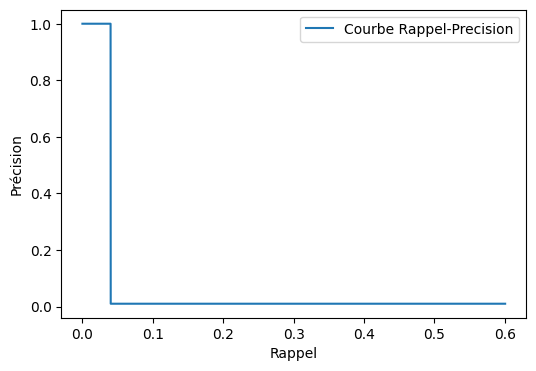

In [9]:
import tkinter as tk
from tkinter import ttk, scrolledtext, font
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import string
#from collections import defaultdict
# Fonction pour ajouter une ligne au tableau
#doc_sel=0
def check_sequence_in_file_for_document(file_path, document_num, sequence):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    for line in lines:
        num_doc = line.split(",")[0].split(":")[0].split(" ")[1]
        if int(num_doc) == int(document_num):
            terms = [line.split(",")[0].split(":")[1].split("'")[1] for line in lines if int(line.split(",")[0].split(":")[0].split(" ")[1]) == int(document_num)]

            for i in range(len(terms) - len(sequence) + 1):
                current_sequence = terms[i:i + len(sequence)]
                if current_sequence == sequence:
                    return True
    return False

# Exemple d'utilisation
file_path = 'descripteursTokenPorter.txt'
document_number = 1
sequence_to_check = ['document', 'rank']

# Vérification de la séquence dans le document spécifié par le numéro
result = check_sequence_in_file_for_document(file_path, document_number, sequence_to_check)

# Affichage du résultat
if result:
    print(f"La séquence se trouve dans le document {document_number}.")
else:
    print(f"La séquence ne se trouve pas dans le document {document_number}.")

def ajouter_ligne_au_tableau(ligne,i):
    # Split la ligne pour obtenir les valeurs de chaque colonne
    document = ligne.split(":")[0].strip()
    terme = ligne.split("Terme")[1].split(",")[0].strip()
    frequence = ligne.split("Frequence")[1].split(",")[0].strip()
    poids = ligne.split("Poids")[1].strip()

    # Ajoute la ligne au tableau
    tableau.insert("", "end", values=(i-4,document, terme, frequence, poids))

# Fonction pour effacer le contenu du tableau
def effacer_tableau():
    for item in tableau.get_children():
        tableau.delete(item)


def calculer_rsv11(descripteurs_file, termes):
    dict_rsv = {}
    for i in range(1, 6005):
        dict_rsv[i]=0
    with open(descripteurs_file, "r") as fichier:
        lignes = fichier.readlines()
    for term in termes:
        for ligne in lignes:
            terme = ligne.split(",")[0].split(":")[1].split("'")[1]
            poid = ligne.split(",")[2].split(":")[1]
            num_doc = ligne.split(",")[0].split(":")[0].split(" ")[1]
            if str(term) == str(terme):
                dict_rsv[int(num_doc)] += float(poid) 
    
    # Utiliser sorted() pour trier le dictionnaire en fonction des valeurs de RSV
    dict_rsv_trie = {k: v for k, v in sorted(dict_rsv.items(), key=lambda item: item[1], reverse=True)}
    return dict_rsv_trie



def calculer_rsv22(descripteurs_file,termes):
    dict_rsv = {}
    det= {}
    for i in range(1, 6005):
        dict_rsv[i]=0
        det[i]= 0
    with open(descripteurs_file, "r") as fichier:
        lignes = fichier.readlines()
        vi=len(termes)    
    for ligne in lignes:
        terme = ligne.split(",")[0].split(":")[1].split("'")[1]
        poid = ligne.split(",")[2].split(":")[1]
        num_doc = ligne.split(",")[0].split(":")[0].split(" ")[1]
        det[int(num_doc)] += float(poid) * float(poid)
        if (str(terme) in termes) :
            if det[int(num_doc)]== 0 :
                dict_rsv[int(num_doc)] = 0
            else:
                dict_rsv[int(num_doc)] += float(poid)
    for i, val in dict_rsv.items():
        if det[int(i)]!=0:
            #print(f'{i}:::::::::::::{math.sqrt(det[i])}')
            dict_rsv[i]= dict_rsv[i]/(math.sqrt(vi)*math.sqrt(det[int(i)]))
        else:
            dict_rsv[i]=0
    # Utiliser sorted() pour trier le dictionnaire en fonction des valeurs de RSV
    dict_rsv_trie = {k: v for k, v in sorted(dict_rsv.items(), key=lambda item: item[1], reverse=True)}
    return dict_rsv_trie

def calculer_rsv33(descripteurs_file,termes):
    dict_rsv = {}
    det= {}
    for i in range(1, 6005):
        dict_rsv[i]=0
        det[i]= 0
    with open(descripteurs_file, "r") as fichier:
        lignes = fichier.readlines()
        vi=len(termes)
    for ligne in lignes:
        terme = ligne.split(",")[0].split(":")[1].split("'")[1]
        poid = ligne.split(",")[2].split(":")[1]
        num_doc = ligne.split(",")[0].split(":")[0].split(" ")[1]
        det[int(num_doc)] += float(poid) * float(poid)
        if (str(terme) in termes) :
            if det[int(num_doc)]== 0 :
                dict_rsv[int(num_doc)] = 0
            else:
                dict_rsv[int(num_doc)] += float(poid)
    for i, val in dict_rsv.items():
        if det[int(i)]!=0 :
           # print(f'{i}:::::::::::::{math.sqrt(det[i])}')
            dict_rsv[i]= dict_rsv[i]/(vi+det[int(i)]-dict_rsv[i])
        else:
            dict_rsv[i]=0
    # Utiliser sorted() pour trier le dictionnaire en fonction des valeurs de RSV
    dict_rsv_trie = {k: v for k, v in sorted(dict_rsv.items(), key=lambda item: item[1], reverse=True)}
    return dict_rsv_trie                

def calculer_rsv_bm255( descripteurs_file, k, b,termes):
    dict_rsv = {}
    dl= {}
    for i in range(1, 6005):
        dict_rsv[i]=0
        dl[i]= 0
    with open(descripteurs_file, "r") as fichier:
        lignes = fichier.readlines()
        for term in termes:
            ni = 0
            for ligne in lignes:
                terme = ligne.split(",")[0].split(":")[1].split("'")[1]
                freq = int(ligne.split("'")[2].split(",")[1].split(":")[1])
                num_doc = int(ligne.split(",")[0].split(":")[0].split(" ")[1])
                dl[num_doc] += freq
                if term == terme :
                    ni += 1
                    dict_rsv[num_doc] = freq
    avdl=0            
    for i, val in dl.items():
        avdl+=val
    avdl/=6004
    for i, val in dict_rsv.items():   
        if dl[i]!=0 and avdl!=0: 
            dict_rsv[i] = (dict_rsv[i]/ (k * ((1 - b) + b * (dl[i] / avdl))+dict_rsv[i]))* math.log10((6004 - ni + 0.5) / (ni + 0.5))
    #dict_tr={k: dict_rsv[k] for k in sorted(dict_rsv, key=lambda x: int(x))}
    # Utiliser sorted() pour trier le dictionnaire en fonction des valeurs de RSV
    dict_rsv_trie = {k: v for k, v in sorted(dict_rsv.items(), key=lambda item: item[1], reverse=True)}
    return dict_rsv_trie
'''def calculer_rsv1(descripteurs_file,termes):
    dict={}
      # Initialiser le RSV à 1.0
    with open(descripteurs_file, "r") as fichier:
        for i in range(1,6004):
            l=0
            rsv=[] 
            lignes = fichier.readlines()
            
            for term in termes:
                for ligne in lignes:
                    terme = ligne.split(",")[0].split(":")[1].split("'")[1]
                    poid = ligne.split(",")[2].split(":")[1]
                    num_doc = ligne.split(",")[0].split(":")[0].split(" ")[1]
                    if str(term) == str(terme) and int(num_doc) == int(i) :
                        rsv.append(float(poid))
                        l+=1
            dict[i]=sum(rsv)
            if check_sequence_in_file_for_document(descripteurs_file,j,termes) ==True:
                return sum(rsv)
                        #print(f'kk  {term}:{j}:{terme}')
            #print(f'rsvv:{rsv}')
            else:
        #return sum(rsv)
        return dict


    
def calculer_rsv2(descripteurs_file,j,termes):
    with open(descripteurs_file, "r") as fichier:
        rsv = 0  # Initialiser le RSV à 1.0
        det=0
        lignes = fichier.readlines()
        vi=len(termes)
        #for term in termes:
    
        for ligne in lignes:
            terme = ligne.split(",")[0].split(":")[1].split("'")[1]
            poid = ligne.split(",")[2].split(":")[1]
            num_doc = ligne.split(",")[0].split(":")[0].split(" ")[1]
            if int(num_doc) == int(j) :
                det+=(float(poid)*float(poid))
            if (str(terme) in termes) and int(num_doc) == int(j) :
                    rsv+=float(poid)
            
                
        #vi=len(termes)
                #print(f'kk  {term}:{j}:{terme}')
            #print(rsv)
        if det== 0 or vi==0:
            return 0
        else:
            return rsv/(math.sqrt(vi)*math.sqrt(det))


def calculer_rsv3(descripteurs_file,j,termes):
    with open(descripteurs_file, "r") as fichier:
        l=0
        rsv = 0  # Initialiser le RSV à 1.0
        det=0
        w2=0    
        lignes = fichier.readlines()
        vi=len(termes)
        #for term in termes:
        for ligne in lignes:
            terme = ligne.split(",")[0].split(":")[1].split("'")[1]
            poid = ligne.split(",")[2].split(":")[1]
            num_doc = ligne.split(",")[0].split(":")[0].split(" ")[1]
            if int(num_doc) == int(j) :
                #det = det+ (float(poid))*(float(poid))
                w2+= float(poid) * float(poid)
            if (str(terme) in termes) and int(num_doc) == int(j):
                rsv += float(poid)
                #vi+=1
                #print(f'kk  {term}:{j}:{terme}')
            #print(f'det: {det}')
                        
        if vi == 0 or rsv == 0:
            return 0
        else:
            return rsv/((vi)+(w2)-rsv)'''

def update_tableau():
    tableau.update_idletasks()

'''def calculer_rsv_bm25( descripteurs_file, j, k, b,termes):
    bm25_score=0

    with open(descripteurs_file, "r") as fichier:
        lignes = fichier.readlines()
    
        for term in termes:
            freq_ti_j = 0
            dl = 0
            ni = 0
            avdl=0

            for ligne in lignes:
                terme = ligne.split(",")[0].split(":")[1].split("'")[1]
                freq = int(ligne.split("'")[2].split(",")[1].split(":")[1])
                num_doc = int(ligne.split(",")[0].split(":")[0].split(" ")[1])
                if term == terme:
                    ni += 1
                if num_doc == int(j):
                    dl += freq
                if term == terme and num_doc == j:
                    freq_ti_j = freq
                avdl+=freq
            avdl=avdl/6004
            #print(f'avdl:{len(lignes)}')        
            bm25_score += (((freq_ti_j ) / (k * ((1 - b) + b * (dl / avdl))+freq_ti_j))* math.log10((6004 - ni + 0.5) / (ni + 0.5)))
        #print(f'dl:{dl}')
        return bm25_score'''
    
# Lire le contenu du fichier
dict={}
# Initialiser le dictionnaire
dictionnaire_requetes = {}
# Diviser le contenu du fichier en lignes
lignes = (open("LISA.REL", "r").read()).split('\n')
# Initialiser les variables pour le traitement
num_requete = None
nombre_documents_pertinents = None
documents_pertinents = []
# Parcourir les lignes du fichier
for ligne in lignes:
    # Utiliser une expression régulière pour extraire le numéro de requête
    match = re.search(r'Query (\d+)', ligne)
    if match:
        # S'il y a un numéro de requête, mettre à jour les variables
        if num_requete is not None:
            dictionnaire_requetes[num_requete] = documents_pertinents
            documents_pertinents = []
        num_requete = int(match.group(1))
        nombre_documents_pertinents = None  # Réinitialiser le nombre de documents pertinents
    else:
        # Vérifier si la ligne contient le nombre de documents pertinents
        match_nombre_docs = re.search(r'(\d+) Relevant Refs:', ligne)
        if match_nombre_docs:
            nombre_documents_pertinents = int(match_nombre_docs.group(1))
        else:
            # Si la ligne ne correspond pas à un numéro de requête ou au nombre de documents pertinents, vérifier si elle contient des documents pertinents
            documents = re.findall(r'\d+', ligne)
            if documents and nombre_documents_pertinents is not None:
                documents_pertinents.extend(map(int, documents))
# Ajouter la dernière requête au dictionnaire
if num_requete is not None:
    dictionnaire_requetes[num_requete] = documents_pertinents
# Afficher le dictionnaire résultant
#for nureq, perts in dictionnaire_requetes.items():
#    print(f'{nureq}:: {len(perts)}')
def precision(descripteurs_file,num_reqette):
    verif=[]
    docperts=0
    totalperts=0
    classement=[]
    pertinant=[]
    precision_reel=[]
    rappel_reel=[]
    precision=[]
    rappel=[]
    p=0
    r=0
    pa5=0
    pa10=0
    for i in range(6004):
        classement.append(i+1)
        pertinant.append(0)
        precision_reel.append(0)
        rappel_reel.append(0)
        
    
    for nureq, perts in dictionnaire_requetes.items():
        for p in range(len(perts)):
            if num_reqette==nureq:
                pertinant[perts[p]-1]=1
                totalperts+=1
    '''print(pertinant)
    print(totalperts)
    for i in range(len(pertinant)):
        if pertinant[i]==1:
            print(i)'''

    for i in range(len(classement)):
        if pertinant[i]==1:
            docperts+=1
        precision_reel[i]=round(docperts/(i+1),2)
        rappel_reel[i]=round(docperts/totalperts,2)
    #print(rappel_reel)
    for i in pertinant[:6]:
        if i==1:
            pa5+=1
    pa5=pa5/5
    for i in pertinant[:11]:
        if i==1:
            pa10+=1
            p+=1
            r+=1
    p=p/5
    r=r/totalperts
    pa10=pa10/10


    for i in range(len(classement)+1):
        rappel.append(i/10000)
        precision.append(0)
    for i in range(len(rappel)):
        for j in range(len(classement)):
            if rappel_reel[j] >= rappel[i]:
                verif.append(precision_reel[j])
        #print(verif)
        precision[i]=max(verif)
        verif=[]

    fscore= (2*p*r)/(p+r)
    print(rappel_reel)
    print(precision_reel)    
    return pa5, pa10, rappel, precision,fscore, p, r


    
    
#rsv_calcule = calculer_rsv_bm25("documents ranking", "descripteursTokenPorter.txt",1,2,1.5)
#print(rsv_calcule)
# Fonction pour l affichage 
def afficher_documents():
    Porter = nltk.PorterStemmer()
    Lancaster = nltk.LancasterStemmer()
    num_doc=entry.get()
    i=7
    if query.get()==1:
        '''with open('LISA.QUE', "r") as fichier: 
            lignes = fichier.readlines()'''
        # Définir le nom du fichier
        nom_fichier = 'LISA.QUE'  # Remplacez par le chemin réel de votre fichier
        # Initialiser le tableau des requêtes
        requetes = []
        # Lire le contenu du fichier
        with open(nom_fichier, 'r', encoding='utf-8') as fichier:
            contenu = fichier.read()
        # Diviser le contenu en requêtes en utilisant '#' comme séparateur
        # et en éliminant les lignes vides
        requetes_brutes = [requete.strip() for requete in contenu.split('#') if requete.strip()]
        # Ajouter les requêtes dans le tableau après suppression des numéros
        for requete in requetes_brutes:
            lignes_requete = requete.split('\n')
            requete_sans_numero = ' '.join(lignes_requete[1:])
            requetes.append(requete_sans_numero.strip())
    

        entry.delete(0, tk.END)  # Efface le contenu existant (si nécessaire)
        entry.insert(0, str(requetes[int(num_quer.get())-1]).strip('?'))
        pa55,pa100,rappell,precisionn,fscoree,pre,rap=precision('Judgements.txt',int(num_quer.get()))
        print(f'rappellllllll::{(rappell)}')
        print(f'precisionnnnnn::{(precisionn)}')
        label_rappel.config(text=f"Rappel : {(rap):.2f}")
        label_precision.config(text=f"Précision : {(pre):.2f}")
        pa5.config(text=f"P@5 : {(pa55):.2f}")
        pa10.config(text=f"P@10 : {(pa100):.2f}")
        fscore.config(text=f"F-score : {(fscoree):.2f}")
        
        
        # Création de la figure
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.plot(rappell, precisionn, label='Courbe Rappel-Precision')
        ax.set_xlabel('Rappel')
        ax.set_ylabel('Précision')
        ax.legend()

        # Création d'une nouvelle fenêtre pour afficher le graphique
        nouvelle_fenetre = tk.Toplevel(fenetre)
        nouvelle_fenetre.title("Graphique Rappel-Precision")

        # Affichage de la figure dans la nouvelle fenêtre
        canvas = FigureCanvasTkAgg(fig, master=nouvelle_fenetre)
        canvas_widget = canvas.get_tk_widget()
        canvas_widget.pack()
    if indexxx.get() == 1:
        for col in tableau["columns"]:
            tableau.heading(col, text="")

        # Créer de nouveaux noms de colonnes
        nouveaux_noms = ["i", "Document", "Terme", "Fréquence", "Poids"]
        for i, nom_colonne in enumerate(nouveaux_noms):
            colonne_id = tableau["columns"][i]
            tableau.heading(colonne_id, text=nom_colonne)
        terme_recherche = entry.get().lower()
        if termeParDoc.get() == 1:
            if tokenization.get()==1:
                if porter.get()==1:
                    effacer_tableau()
                    with open("descripteursTokenPorter.txt", "r") as fichier:
                        lignes = fichier.readlines()
                        for ligne in lignes:
                            num = ligne.split(",")[0].split(":")[0].split(" ")[1]
                            if num == num_doc:
                                i+=1
                                ajouter_ligne_au_tableau(ligne,i)
                            
                elif lancaster.get()==1:
                    terme_recherche=Lancaster.stem(terme_recherche)
                    effacer_tableau()
                    with open("descripteursTokenLancaster.txt", "r") as fichier:
                        lignes = fichier.readlines()
                        for ligne in lignes:
                            num = ligne.split(",")[0].split(":")[0].split(" ")[1]
                            if num == num_doc:
                                i+=1
                                ajouter_ligne_au_tableau(ligne,i)
                            
            elif tokenization.get()==0:
                if porter.get()==1:
                    terme_recherche=Porter.stem(terme_recherche)
                    effacer_tableau()
                    with open("descripteursSplitPorter.txt", "r") as fichier:
                        lignes = fichier.readlines()
                        for ligne in lignes:
                            num = ligne.split(",")[0].split(":")[0].split(" ")[1]
                            if num == num_doc:
                                i+=1
                                ajouter_ligne_au_tableau(ligne,i)
                            
                elif lancaster.get()==1:
                    terme_recherche=Lancaster.stem(terme_recherche)
                    effacer_tableau()
                    with open("descripteursSplitLancaster.txt", "r") as fichier:
                        lignes = fichier.readlines()
                        for ligne in lignes:
                            num = ligne.split(",")[0].split(":")[0].split(" ")[1]
                            if num == num_doc:
                                i+=1
                                ajouter_ligne_au_tableau(ligne,i)
                            
        else:
            if tokenization.get()==1:
                if porter.get()==1:
                    terme_recherche=Porter.stem(terme_recherche)
                    effacer_tableau()
                    with open("descripteursTokenPorter.txt", "r") as fichier:
                        lignes = fichier.readlines()
                        for ligne in lignes:
                            terme = ligne.split(",")[0].split(":")[1].split("'")[1]
                            if terme_recherche == terme:
                                i+=1
                                ajouter_ligne_au_tableau(ligne,i)
                                
                elif lancaster.get()==1:
                    terme_recherche=Lancaster.stem(terme_recherche)
                    effacer_tableau()
                    with open("descripteursTokenLancaster.txt", "r") as fichier:
                        lignes = fichier.readlines()
                        for ligne in lignes:
                            terme = ligne.split(",")[0].split(":")[1].split("'")[1]
                            if terme_recherche == terme:
                                i+=1
                                ajouter_ligne_au_tableau(ligne,i)
                                
            else:
                if porter.get()==1:
                    terme_recherche=Porter.stem(terme_recherche)
                    effacer_tableau()
                    with open("descripteursSplitPorter.txt", "r") as fichier:
                        lignes = fichier.readlines()
                        for ligne in lignes:
                            terme = ligne.split(",")[0].split(":")[1].split("'")[1]
                            if terme_recherche == terme:
                                i+=1
                                ajouter_ligne_au_tableau(ligne,i)
                                
                elif lancaster.get()==1:
                    terme_recherche=Lancaster.stem(terme_recherche)
                    effacer_tableau()
                    with open("descripteursSplitLancaster.txt", "r") as fichier:
                        lignes = fichier.readlines()
                        for ligne in lignes:
                            terme = ligne.split(",")[0].split(":")[1].split("'")[1]
                            if terme_recherche == terme:
                                i+=1
                                ajouter_ligne_au_tableau(ligne,i)
    else:
        
        for col in tableau["columns"]:
            tableau.heading(col, text="")

        # Créer de nouveaux noms de colonnes
        nouveaux_noms = ["Num Document", "Relevance"]
        for i, nom_colonne in enumerate(nouveaux_noms):
            colonne_id = tableau["columns"][i]
            tableau.heading(colonne_id, text=nom_colonne)
        terme_recherche = entry.get().lower()
    
        if selected_option.get()=="Produit Scalaire":
            if tokenization.get()==1:
                if porter.get()==1:
                    effacer_tableau()
                    termess=[]
                    for term in terme_recherche.split():
                        term1 = Porter.stem(term)
                        termess.append(term1)
                    #for j in range(1, 20):
                    rsv_calcule = calculer_rsv11("descripteursTokenPorter.txt",termess)
                    for i, val in rsv_calcule.items():
                        if val!=0:
                            tableau.insert("", "end", values=(i, "{:.4f}".format(val)))
                        #doc_sel+=1
                                
                elif lancaster.get()==1:
                    effacer_tableau()
                    termess=[]
                    for term in terme_recherche.split():
                        term1 = Lancaster.stem(term)
                        termess.append(term1)
                    #for j in range(1, 20):
                    rsv_calcule = calculer_rsv11("descripteursTokenLancaster.txt",termess)
                    for i, val in rsv_calcule.items():
                        if val!=0:
                            tableau.insert("", "end", values=(i, "{:.4f}".format(val)))
                        #doc_sel+=1
                                
            else:
                if porter.get()==1:
                    effacer_tableau()
                    termess=[]
                    for term in terme_recherche.split():
                        term1 = Porter.stem(term)
                        termess.append(term1)
                    #for j in range(1, 20):
                    rsv_calcule = calculer_rsv11("descripteursSplitPorter.txt",termess)
                    for i, val in rsv_calcule.items():
                        if val!=0:
                            tableau.insert("", "end", values=(i, "{:.4f}".format(val)))
                        #doc_sel+=1
                                
                elif lancaster.get()==1:
                    effacer_tableau()
                    termess=[]
                    for term in terme_recherche.split():
                        if term not in string.punctuation:
                            term1 = Lancaster.stem(term)  
                            termess.append(term1)
                    #for j in range(1, 20):
                    rsv_calcule = calculer_rsv11("descripteursSplitLancaster.txt",termess)
                    for i, val in rsv_calcule.items():
                        if val!=0:
                            tableau.insert("", "end", values=(i, "{:.4f}".format(val)))
                            #doc_sel+=1
        elif selected_option.get()=="Similarité Cosinus":
            if tokenization.get()==1:
                if porter.get()==1:
                    effacer_tableau()
                    termess=[]
                    for term in terme_recherche.split():
                        term1 = Porter.stem(term)
                        termess.append(term1)
                    for j in range(1, 20):
                        rsv_calcule = calculer_rsv22("descripteursTokenPorter.txt",termess)
                        for i, val in rsv_calcule.items():
                            if val!=0:
                                tableau.insert("", "end", values=(i, "{:.4f}".format(val)))
                            #doc_sel+=1
                                
                elif lancaster.get()==1:
                    effacer_tableau()
                    termess=[]
                    for term in terme_recherche.split():
                        term1 = Lancaster.stem(term)
                        termess.append(term1)
                    for j in range(1, 20):
                        rsv_calcule = calculer_rsv22("descripteursTokenLancaster.txt",termess)
                        for i, val in rsv_calcule.items():
                            if val!=0:
                                tableau.insert("", "end", values=(i, "{:.4f}".format(val)))
                            #doc_sel+=1
                                
            else:
                if porter.get()==1:
                    effacer_tableau()
                    termess=[]
                    for term in terme_recherche.split():
                        term1 = Porter.stem(term)
                        termess.append(term1)
                    for j in range(1, 20):
                        rsv_calcule = calculer_rsv22("descripteursSplitPorter.txt",termess)
                        for i, val in rsv_calcule.items():
                            if val!=0:
                                tableau.insert("", "end", values=(i,  "{:.4f}".format(val)))
                            #doc_sel+=1
                                
                elif lancaster.get()==1:
                    effacer_tableau()
                    termess=[]
                    for term in terme_recherche.split():
                        term1 = Lancaster.stem(term)
                        termess.append(term1)
                    for j in range(1, 20):
                        rsv_calcule = calculer_rsv22("descripteursSplitLancaster.txt",termess)
                        for i, val in rsv_calcule.items():
                            if val!=0:
                                tableau.insert("", "end", values=(i,  "{:.4f}".format(val)))
                            #doc_sel+=1
        elif selected_option.get()=="Indice de Jaccard":
            if tokenization.get()==1:
                if porter.get()==1:
                    effacer_tableau()
                    termess=[]
                    for term in terme_recherche.split():
                        term1 = Porter.stem(term)
                        termess.append(term1)
                    for j in range(1, 20):
                        rsv_calcule = calculer_rsv33("descripteursTokenPorter.txt",termess)
                        for i, val in rsv_calcule.items():
                            if val!=0:
                                tableau.insert("", "end", values=(i, "{:.4f}".format(val)))
                            #doc_sel+=1
                                
                elif lancaster.get()==1:
                    effacer_tableau()
                    termess=[]
                    for term in terme_recherche.split():
                        term1 = Lancaster.stem(term)
                        termess.append(term1)
                    for j in range(1, 20):
                        rsv_calcule = calculer_rsv33("descripteursTokenLancaster.txt",termess)
                        for i, val in rsv_calcule.items():
                            if val!=0:
                                tableau.insert("", "end", values=(i, "{:.4f}".format(val)))
                                
            else:
                if porter.get()==1:
                    effacer_tableau()
                    termess=[]
                    for term in terme_recherche.split():
                        term1 = Porter.stem(term)
                        termess.append(term1)
                    for j in range(1, 20):
                        rsv_calcule = calculer_rsv33("descripteursSplitPorter.txt",termess)
                        for i, val in rsv_calcule.items():
                            if val!=0:
                                tableau.insert("", "end", values=(i,  "{:.4f}".format(val)))
                                
                elif lancaster.get()==1:
                    effacer_tableau()
                    termess=[]
                    for term in terme_recherche.split():
                        term1 = Lancaster.stem(term)
                        termess.append(term1)
                    for j in range(1, 20):
                        rsv_calcule = calculer_rsv33("descripteursSplitLancaster.txt",termess)
                        for i, val in rsv_calcule.items():
                            if val!=0:
                                tableau.insert("", "end", values=(i , "{:.4f}".format(val)))
        elif bm255.get()==1:
            k=float(K.get())
            b=float(B.get())
            if tokenization.get()==1:
                if porter.get()==1:
                    termess=[]
                    for term in terme_recherche.split():
                        term1 = Porter.stem(term)
                        termess.append(term1)
                    effacer_tableau()
                    #for j in range(1, 20):
                    rsv_calcule = calculer_rsv_bm255("descripteursTokenPorter.txt",k,b,termess)
                    for i , val in rsv_calcule.items():
                        if val!=0:
                            tableau.insert("", "end", values=(i, "{:.4f}".format(val)))
                            #doc_sel+=1
                                
                elif lancaster.get()==1:
                    effacer_tableau()
                    termess=[]
                    for term in terme_recherche.split():
                        term1 = Lancaster.stem(term)
                        termess.append(term1)
                    #for j in range(1, 20):
                    rsv_calcule = calculer_rsv_bm255("descripteursTokenLancaster.txt",k,b,termess)
                    for i , val in rsv_calcule.items():
                        if val!=0:
                            tableau.insert("", "end", values=(i, "{:.4f}".format(val)))
                            #doc_sel+=1
                                
            else:
                if porter.get()==1:
                    effacer_tableau()
                    termess=[]
                    for term in terme_recherche.split():
                        term1 = Porter.stem(term)
                        termess.append(term1)
                    #for j in range(1, 20):
                    rsv_calcule = calculer_rsv_bm255("descripteursSplitPorter.txt",k,b,termess)
                    for i , val in rsv_calcule.items():
                        if val!=0:
                            tableau.insert("", "end", values=(i, "{:.4f}".format(val)))
                            #doc_sel+=1
                                
                elif lancaster.get()==1:
                    termess=[]
                    for term in terme_recherche.split():
                        term1 = Lancaster.stem(term)
                        termess.append(term1)
                    effacer_tableau()
                    #for j in range(1, 20):
                    rsv_calcule = calculer_rsv_bm255("descripteursSplitLancaster.txt",k,b,termess)
                    for i , val in rsv_calcule.items():
                        if val!=0:
                            tableau.insert("", "end", values=(i, "{:.4f}".format(val)))
                            #doc_sel+=1
        elif boolean.get()==1:
            if tokenization.get()==1:
                if porter.get()==1:
                    termess=""
                    for term in terme_recherche.split():
                        term1 = Porter.stem(term)
                        termess=termess+""+term1
                    effacer_tableau()
                    for j in [437,948,2712,2967,4017]:
                        rsv_calcule = exist_request("descripteursTokenPorter.txt",j,termess)
                        if rsv_calcule!=False:
                            tableau.insert("", "end", values=(j, rsv_calcule))
                            update_tableau()
                                
                elif lancaster.get()==1:
                    effacer_tableau()
                    termess=""
                    for term in terme_recherche.split():
                        term1 = Lancaster.stem(term)
                        termess=termess+""+term1
                    for j in range(1, 20):
                        rsv_calcule = exist_request("descripteursTokenLancaster.txt",j,termess)
                        if rsv_calcule!=False:
                            tableau.insert("", "end", values=(j,rsv_calcule))
                                
            else:
                if porter.get()==1:
                    effacer_tableau()
                    termess=""
                    for term in terme_recherche.split():
                        term1 = Porter.stem(term)
                        termess=termess+""+term1
                    for j in range(1, 20):
                        rsv_calcule = exist_request("descripteursSplitPorter.txt",j,termess)
                        if rsv_calcule!=False:
                            tableau.insert("", "end", values=(j, "{:.4f}".format(rsv_calcule)))
                                
                elif lancaster.get()==1:
                    termess=""
                    for term in terme_recherche.split():
                        term1 = Lancaster.stem(term)
                        termess=termess+""+term1
                    effacer_tableau()
                    for j in range(1, 20):
                        rsv_calcule = exist_request("descripteursSplitLancaster.txt",j,termess)
                        if rsv_calcule!=False:
                            tableau.insert("", "end", values=(j, "{:.4f}".format(rsv_calcule)))
                            update_tableau



# Créer une fenêtre Tkinter
fenetre = tk.Tk()
fenetre.title("Recherche de termes")
fenetre.geometry("1200x1200")

# Créer une étiquette
etiquette = tk.Label(fenetre, text="Entrez un terme:")
etiquette.pack()

# Créer une zone de saisie pour le terme
entry = tk.Entry(fenetre)
entry.pack()

# Frame pour contenir les cases à cocher
frame_checkbox = tk.Frame(fenetre)
frame_checkbox.pack(side=tk.TOP)

# Créer une variable pour stocker l'état de la case à cocher
termeParDoc = tk.IntVar()
tokenization = tk.IntVar()
porter = tk.IntVar()
lancaster = tk.IntVar()
indexxx = tk.IntVar()
bm255=tk.IntVar()
boolean=tk.IntVar()
query= tk.IntVar()
# Créer une case à cocher
case_a_cocher1 = tk.Checkbutton(frame_checkbox, text="Terms per Docs", variable=termeParDoc)
case_a_cocher1.grid(row=0, column=1, padx=5)

case_a_cocher2 = tk.Checkbutton(frame_checkbox, text="Tokenization", variable=tokenization)
case_a_cocher2.grid(row=0, column=2, padx=5)

case_a_cocher3 = tk.Checkbutton(frame_checkbox, text="Porter", variable=porter)
case_a_cocher3.grid(row=0, column=3, padx=5)


case_a_cocher4 = tk.Checkbutton(frame_checkbox, text="Lancaster", variable=lancaster)
case_a_cocher4.grid(row=0, column=4, padx=5)


indexx = tk.Checkbutton(frame_checkbox, text="Index", variable=indexxx)
indexx.grid(row=0, column=7, padx=5)

def on_select(event):
    selected_value = combo.get()
    
booleann = tk.Checkbutton(frame_checkbox, text="Boolean", variable=boolean)
booleann.grid(row=0, column=5, padx=5)

# Options pour la combobox
options = ["Produit Scalaire", "Similarité Cosinus", "Indice de Jaccard"," / "]

# Variable pour stocker la sélection
selected_option = tk.StringVar()

num_quer = tk.Spinbox(fenetre, from_=1, to=35, increment=1, width=10)
num_quer.pack(pady=10)
# Création de la combobox
combo = ttk.Combobox(fenetre, values=options, textvariable=selected_option)
combo.pack(pady=10)

bm25 = tk.Checkbutton(frame_checkbox, text="BM25", variable=bm255)
bm25.grid(row=0, column=8, padx=5)

queryy = tk.Checkbutton(frame_checkbox, text="Queries dataset", variable=query)
queryy.grid(row=0, column=9, padx=5)


etiquette = tk.Label(fenetre, text="K:")
etiquette.pack()
K = tk.Entry(fenetre)
K.pack()
etiquette = tk.Label(fenetre, text="B:")
etiquette.pack()
B = tk.Entry(fenetre)
B.pack()


# Étiquette pour afficher l'option sélectionnée
label = tk.Label(fenetre, text="")
label.pack(pady=10)

# Lier la fonction on_select à l'événement de sélection
combo.bind("<<ComboboxSelected>>", on_select)

# Créer un bouton pour lancer la recherche
bouton_recherche = tk.Button(fenetre, text="Rechercher", command=afficher_documents)
bouton_recherche.pack()

# Crée une division (Frame) pour contenir les tableaux
division = tk.Frame(fenetre)
division.pack()
# Créer un tableau avec les colonnes "Document", "Terme", "Fréquence" et "Poids"
tableau = ttk.Treeview(fenetre, columns=("i", "Document", "Terme", "Fréquence", "Poids"), show="headings")
tableau.heading("i", text="i")
tableau.heading("Document", text="Document")
tableau.heading("Terme", text="Terme")
tableau.heading("Fréquence", text="Fréquence")
tableau.heading("Poids", text="Poids")
tableau.pack()
# Création d'un objet de style de police en gras
style_gras = font.Font(weight="bold")
# Créer une barre de défilement pour le tableau
scrollbar = ttk.Scrollbar(fenetre, orient="vertical", command=tableau.yview)
scrollbar.pack(side="right", fill="y")
tableau.configure(yscrollcommand=scrollbar.set)

# Création de labels pour afficher les résultats
label_rappel = tk.Label(fenetre, text="Rappel : ", font=style_gras)
label_rappel.pack()

label_precision = tk.Label(fenetre, text="Précision : ", font=style_gras)
label_precision.pack()

pa5 = tk.Label(fenetre, text="P@5 : ", font=style_gras)
pa5.pack()
pa10 = tk.Label(fenetre, text="P@10 : ", font=style_gras)
pa10.pack()

fscore = tk.Label(fenetre, text="F-score : ", font=style_gras)
fscore.pack()

# Création du style pour le tableau
style = ttk.Style()
style.configure("Custom.Treeview.Heading", font=("Arial", 12))
style.configure("Custom.Treeview", font=("Arial", 10))
style.layout("Custom.Treeview", [('Custom.Treeview.treearea', {'sticky': 'nswe'})])


# Créer une zone de texte pour afficher les résultats
#resultat = tk.Text(fenetre, wrap=tk.WORD, width=40, height=2)
#resultat.pack()

# Lancer la boucle principale de l'interface graphique
fenetre.mainloop()


In [10]:
for i in range(1, 6005):
    print(calculer_rsv1('descripteursSplitLancaster.txt',i,['ind show']))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


KeyboardInterrupt: 

In [85]:
def check_sequence_in_file_for_document(file_path, document_num, sequence):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    for line in lines:
        num_doc = line.split(",")[0].split(":")[0].split(" ")[1]
        if int(num_doc) == int(document_num):
            terms = [line.split(",")[0].split(":")[1].split("'")[1] for line in lines if int(line.split(",")[0].split(":")[0].split(" ")[1]) == int(document_num)]

            for i in range(len(terms) - len(sequence) + 1):
                current_sequence = terms[i:i + len(sequence)]
                if current_sequence == sequence:
                    return True
    return False

# Exemple d'utilisation
file_path = 'descripteursTokenPorter.txt'
document_number = 1
sequence_to_check = ['document', 'rank']

# Vérification de la séquence dans le document spécifié par le numéro
result = check_sequence_in_file_for_document(file_path, document_number, sequence_to_check)

# Affichage du résultat
if result:
    print(f"La séquence se trouve dans le document {document_number}.")
else:
    print(f"La séquence ne se trouve pas dans le document {document_number}.")


La séquence ne se trouve pas dans le document 1.


In [7]:
def exist_dans_doc(descripteurs_file,j,terme):
      # Initialiser le RSV à 1.0
    with open(descripteurs_file, "r") as fichier:
        lignes = fichier.readlines()
        for ligne in lignes:
            term = ligne.split(",")[0].split(":")[1].split("'")[1]
            num_doc = ligne.split(",")[0].split(":")[0].split(" ")[1]
            if str(terme) == str(term) and int(num_doc) == int(j) :
                return True
        return False
#print(exist_dans_doc("descripteursTokenPorter.txt",2,"separ"))

def not_exist_dans_doc(descripteurs_file,j,terme):
    with open(descripteurs_file, "r") as fichier:
        lignes = fichier.readlines()
        for ligne in lignes:
            term = ligne.split(",")[0].split(":")[1].split("'")[1]
            num_doc = ligne.split(",")[0].split(":")[0].split(" ")[1]
            if str(terme) == str(term) and int(num_doc) == int(j) :
                return False
        return True
#print(not_exist_dans_doc("descripteursTokenPorter.txt",2,"separ"))

def and_exist(descripteurs_file,j,phrase):
    sous_phrases = phrase.split("and")
    n= len(sous_phrases)
    for sous_phr in sous_phrases:
        sous_phr= sous_phr.replace(" ", "")
        if ("not" in sous_phr):
            phr= sous_phr.replace("not", "") 
            if not_exist_dans_doc(descripteurs_file,j,phr):
                n-=1
        else:
            if exist_dans_doc(descripteurs_file,j,sous_phr):
                n-=1
    if n==0:
        return True
    else: return False
#print(and_exist("descripteursTokenPorter.txt",2," separ and space and use"))

def or_exist(descripteurs_file,j,phrase):
    sous_phrases = phrase.split("or")
    n= 0
    for sous_phr in sous_phrases:
        sous_phr= sous_phr.replace(" ", "")
        if ("not" in sous_phr):
            phr= sous_phr.replace("not", "") 
            if not_exist_dans_doc(descripteurs_file,j,phr):
                n+=1
        else:
            if exist_dans_doc(descripteurs_file,j,sous_phr):
                n+=1
    if n==0:
        return False
    else: return True
#print(or_exist("descripteursTokenPorter.txt",2,"not separ or spac"))

def exist_request(descripteurs_file,j,phrase):
    sous_phrases = phrase.split("and")
    n=len(sous_phrases)
    for sous_phr in sous_phrases:
        sous_phr= sous_phr.replace(" ", "")
        if ("and" in sous_phr):
            sous_phr= sous_phr.replace("and", "")
            if and_exist(descripteurs_file,j,sous_phr)==True:
                n-=1
        elif ("or" in sous_phr):
            #sous_phr= sous_phr.replace("or", "")
            if or_exist(descripteurs_file,j,sous_phr)==True:
                n-=1
        elif ("not" in sous_phr):
            sous_phr= sous_phr.replace("not", "")
            if not_exist_dans_doc(descripteurs_file,j,sous_phr)==True:
                n-=1
        else:
            if exist_dans_doc(descripteurs_file,j,sous_phr)==True:
                n-=1
    if n==0:
        return True
    else: 
        return False

print(exist_request('descripteursTokenPorter.txt',1," hh "))

False


In [108]:
chaine = "documents and not query"

nouvelle_chaine=""
#termess=" c"
for term in chaine.split():
    term1 = Porter.stem(term)
    print(term1)
    nouvelle_chaine = nouvelle_chaine + " "+str(term1)

print(f'{nouvelle_chaine}')

document
and
not
queri
 document and not queri


In [2]:
def precision(descripteurs_file,num_reqette):
    verif=[]
    docperts=0
    totalperts=0
    classement=[]
    pertinant=[]
    precision_reel=[]
    rappel_reel=[]
    precision=[]
    rappel=[]
    pa5=0
    pa10=0
    for i in range(10):
        classement.append(i+1)
        pertinant.append(0)
        precision_reel.append(0)
        rappel_reel.append(0)
        
    
    with open(descripteurs_file, "r") as fichier: 
        lignes = fichier.readlines()
        for ligne in lignes:
            req= int(ligne.split("	")[0])
            pert= int(ligne.split("	")[1])
            if num_reqette==req:
                pertinant[pert-1]=1
                totalperts+=1

    for i in range(len(classement)):
        if pertinant[i]==1:
            docperts+=1
        precision_reel[i]=round(docperts/(i+1),2)
        rappel_reel[i]=round(docperts/totalperts,2)
    for i in pertinant[:6]:
        if i==1:
            pa5+=1
    pa5=pa5/5
    for i in pertinant[:11]:
        if i==1:
            pa10+=1
    pa10=pa10/10

    for i in range(11):
        rappel.append(i/10)
        precision.append(0)
    
    for i in range(len(rappel)):
        for j in range(len(classement)):
            if rappel_reel[j] >= rappel[i]:
                verif.append(precision_reel[j])
        #print(verif)
        precision[i]=max(verif)
        verif=[]

    #return pa5, pa10, rappel, precision
            

    print(f'classement::    {classement}')
    print(f'pertinant::     {pertinant}')
    print(f'precision_reel::{precision_reel}')
    print(f'rappel_reel::   {rappel_reel}')
    print(f'precision::     {precision}')
    print(f'rappel::        {rappel}')
    print(f'pa5::           {pa5}')
    print(f'pa10::          {pa10}')

precision("Judgements.txt",2)

FileNotFoundError: [Errno 2] No such file or directory: 'Judgements.txt'

In [89]:
num_reqette=1
# Lire le contenu du fichier
dict={}
# Initialiser le dictionnaire
dictionnaire_requetes = {}
# Diviser le contenu du fichier en lignes
lignes = (open("LISA.REL", "r").read()).split('\n')
# Initialiser les variables pour le traitement
num_requete = None
nombre_documents_pertinents = None
documents_pertinents = []
# Parcourir les lignes du fichier
for ligne in lignes:
    # Utiliser une expression régulière pour extraire le numéro de requête
    match = re.search(r'Query (\d+)', ligne)
    if match:
        # S'il y a un numéro de requête, mettre à jour les variables
        if num_requete is not None:
            dictionnaire_requetes[num_requete] = documents_pertinents
            documents_pertinents = []
        num_requete = int(match.group(1))
        nombre_documents_pertinents = None  # Réinitialiser le nombre de documents pertinents
    else:
        # Vérifier si la ligne contient le nombre de documents pertinents
        match_nombre_docs = re.search(r'(\d+) Relevant Refs:', ligne)
        if match_nombre_docs:
            nombre_documents_pertinents = int(match_nombre_docs.group(1))
        else:
            # Si la ligne ne correspond pas à un numéro de requête ou au nombre de documents pertinents, vérifier si elle contient des documents pertinents
            documents = re.findall(r'\d+', ligne)
            if documents and nombre_documents_pertinents is not None:
                documents_pertinents.extend(map(int, documents))
# Ajouter la dernière requête au dictionnaire
if num_requete is not None:
    dictionnaire_requetes[num_requete] = documents_pertinents
# Afficher le dictionnaire résultant
#for nureq, perts in dictionnaire_requetes.items():
#    print(f'{nureq}:: {len(perts)}')

1:: 3
2:: 3
3:: 6
4:: 8
5:: 2
6:: 19
7:: 15
8:: 27
9:: 13
10:: 15
11:: 2
12:: 4
13:: 3
14:: 12
15:: 24
16:: 4
17:: 8
18:: 54
19:: 15
20:: 7
21:: 17
35:: 8
24:: 7
25:: 3
26:: 11
27:: 8
28:: 12
29:: 34
30:: 13
31:: 11
32:: 8
33:: 10
34:: 2


In [111]:
def precision(descripteurs_file,num_reqette):
    verif=[]
    docperts=0
    totalperts=0
    classement=[]
    pertinant=[]
    precision_reel=[]
    rappel_reel=[]
    precision=[]
    rappel=[]
    p=0
    r=0
    pa5=0
    pa10=0
    for i in range(6004):
        classement.append(i+1)
        pertinant.append(0)
        precision_reel.append(0)
        rappel_reel.append(0)
        
    
    for nureq, perts in dictionnaire_requetes.items():
        for p in range(len(perts)):
            if num_reqette==nureq:
                pertinant[perts[p]-1]=1
                totalperts+=1
    '''print(pertinant)
    print(totalperts)
    for i in range(len(pertinant)):
        if pertinant[i]==1:
            print(i)'''

    for i in range(len(classement)):
        if pertinant[i]==1:
            docperts+=1
        precision_reel[i]=round(docperts/(i+1),2)
        rappel_reel[i]=round(docperts/totalperts,2)
    #print(rappel_reel)
    for i in pertinant[:6]:
        if i==1:
            pa5+=1
    pa5=pa5/5
    for i in pertinant[:11]:
        if i==1:
            pa10+=1
            p+=1
            r+=1
    p=p/5
    r=r/totalperts
    pa10=pa10/10


    for i in range(len(classement)+1):
        rappel.append(i/10000)
        precision.append(0)
    for i in range(len(rappel)):
        for j in range(len(classement)):
            if rappel_reel[j] >= rappel[i]:
                verif.append(precision_reel[j])
        #print(verif)
        precision[i]=max(verif)
        verif=[]

    fscore= (2*p*r)/(p+r)

    return pa5, pa10, rappel, precision,fscore, p, r

print(precision('LISA.REL',1))

(0.2, 0.1, [0.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017, 0.0018, 0.0019, 0.002, 0.0021, 0.0022, 0.0023, 0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003, 0.0031, 0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004, 0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0048, 0.0049, 0.005, 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.0057, 0.0058, 0.0059, 0.006, 0.0061, 0.0062, 0.0063, 0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007, 0.0071, 0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008, 0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089, 0.009, 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096, 0.0097, 0.0098, 0.0099, 0.01, 0.0101, 0.0102, 0.0103, 0.0104, 0.0105, 0.0106, 0.0107, 0.0108, 0.0109, 0.011, 0.0111, 0.0112, 0.0113, 0.0114, 0.0115, 0.0116, 0.0117, 0.0118, 0.0119, 0.012, 0.0121, 0.0122, 0.0123, 0.0124, 0.01

In [88]:
num_reqette=1
# Lire le contenu du fichier
dict={}
# Initialiser le dictionnaire
dictionnaire_requetes = {}
# Diviser le contenu du fichier en lignes
lignes = (open("LISA.REL", "r").read()).split('\n')
# Initialiser les variables pour le traitement
num_requete = None
nombre_documents_pertinents = None
documents_pertinents = []
# Parcourir les lignes du fichier
for ligne in lignes:
    # Utiliser une expression régulière pour extraire le numéro de requête
    match = re.search(r'Query (\d+)', ligne)
    if match:
        # S'il y a un numéro de requête, mettre à jour les variables
        if num_requete is not None:
            dictionnaire_requetes[num_requete] = documents_pertinents
            documents_pertinents = []
        num_requete = int(match.group(1))
        nombre_documents_pertinents = None  # Réinitialiser le nombre de documents pertinents
    else:
        # Vérifier si la ligne contient le nombre de documents pertinents
        match_nombre_docs = re.search(r'(\d+) Relevant Refs:', ligne)
        if match_nombre_docs:
            nombre_documents_pertinents = int(match_nombre_docs.group(1))
        else:
            # Si la ligne ne correspond pas à un numéro de requête ou au nombre de documents pertinents, vérifier si elle contient des documents pertinents
            documents = re.findall(r'\d+', ligne)
            if documents and nombre_documents_pertinents is not None:
                documents_pertinents.extend(map(int, documents))
# Ajouter la dernière requête au dictionnaire
if num_requete is not None:
    dictionnaire_requetes[num_requete] = documents_pertinents
# Afficher le dictionnaire résultant
for nureq, perts in dictionnaire_requetes.items():
    print(f'{nureq}:: {len(perts)}')

1:: 3
2:: 3
3:: 6
4:: 8
5:: 2
6:: 19
7:: 15
8:: 27
9:: 13
10:: 15
11:: 2
12:: 4
13:: 3
14:: 12
15:: 24
16:: 4
17:: 8
18:: 54
19:: 15
20:: 7
21:: 17
35:: 8
24:: 7
25:: 3
26:: 11
27:: 8
28:: 12
29:: 34
30:: 13
31:: 11
32:: 8
33:: 10
34:: 2
